# Lesson 4.张量的线性代数运算

&emsp;&emsp;也就是PyTorch中BLAS和LAPACK模块的相关运算。

&emsp;&emsp;PyTorch中并未设置单独的矩阵对象类型，因此PyTorch中，二维张量就相当于矩阵对象，并且拥有一系列线性代数相关函数和方法。      
&emsp;&emsp;在实际机器学习和深度学习建模过程中，矩阵或者高维张量都是基本对象类型，而矩阵所涉及到的线性代数理论也是深度学习用户必备的基本数学基础。因此，本节在介绍张量的线性代数运算时，也会回顾基本的矩阵运算，及其基本线性代数的数学理论基础，以期在强化张量的线性代数运算过程中，也进一步夯实同学的线性代数数学基础。      
&emsp;&emsp;另外，在实际的深度学习建模过程中，往往会涉及矩阵的集合，也就是三维甚至是四维张量的计算，因此在部分场景中，我们也将把二维张量计算拓展到更高维的张量计算。

In [1]:
import torch
import numpy as np

## 一、BLAS和LAPACK概览

&emsp;&emsp;BLAS（Basic Linear Algeria Subprograms）和LAPACK（Linear Algeria Package）模块提供了完整的线性代数基本方法，由于涉及到函数种类较多，因此此处对其进行简单分类，具体包括：
- 矩阵的形变及特殊矩阵的构造方法：包括矩阵的转置、对角矩阵的创建、单位矩阵的创建、上/下三角矩阵的创建等；
- 矩阵的基本运算：包括矩阵乘法、向量内积、矩阵和向量的乘法等，当然，此处还包含了高维张量的基本运算，将着重探讨矩阵的基本运算拓展至三维张量中的基本方法；
- 矩阵的线性代数运算：包括矩阵的迹、矩阵的秩、逆矩阵的求解、伴随矩阵和广义逆矩阵等；
- 矩阵分解运算：特征分解、奇异值分解和SVD分解等。

相关内容如果涉及数学基础，将在讲解过程中逐步补充。

## 二、矩阵的形变及特殊矩阵构造方法

&emsp;&emsp;矩阵的形变方法其实也就是二维张量的形变方法，在此基础上本节将补充转置的基本方法。另外，在实际线性代数运算过程中，经常涉及一些特殊矩阵，如单位矩阵、对角矩阵等，相关创建方法如下：

**<center>Tensor矩阵运算</center>**

|**函数**|**描述**|
| :------:| :------: |
| torch.t(t)        | t转置| 
| torch.eye(n)       | 创建包含n个分量的单位矩阵 | 
| torch.diag(t1)        | 以t1中各元素，创建对角矩阵 | 
| torch.triu(t)        | 取矩阵t中的上三角矩阵 | 
| torch.tril(t)        | 取矩阵t中的下三角矩阵 | 

In [2]:
# 创建一个2*3的矩阵
t1 = torch.arange(1, 7).reshape(2, 3).float()
t1

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [3]:
# 转置
torch.t(t1)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [4]:
t1.t()

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

> 矩阵的转置就是每个元素行列位置互换

In [5]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [6]:
t = torch.arange(5)
t

tensor([0, 1, 2, 3, 4])

In [7]:
torch.diag(t)

tensor([[0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 2, 0, 0],
        [0, 0, 0, 3, 0],
        [0, 0, 0, 0, 4]])

In [8]:
# 对角线向上偏移一位
torch.diag(t, 1)

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 3, 0],
        [0, 0, 0, 0, 0, 4],
        [0, 0, 0, 0, 0, 0]])

In [ ]:
# 对角线向下偏移一位
torch.diag(t, -1)

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0],
        [0, 0, 0, 3, 0, 0],
        [0, 0, 0, 0, 4, 0]])

In [ ]:
t1 = torch.arange(9).reshape(3, 3)
t1

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [ ]:
# 取上三角矩阵
torch.triu(t1)

tensor([[0, 1, 2],
        [0, 4, 5],
        [0, 0, 8]])

In [ ]:
# 上三角矩阵向左下偏移一位
torch.triu(t1, -1)

tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 7, 8]])

In [ ]:
# 上三角矩阵向右上偏移一位
torch.triu(t1, 1)

tensor([[0, 1, 2],
        [0, 0, 5],
        [0, 0, 0]])

In [ ]:
# 下三角矩阵
torch.tril(t1)

tensor([[0, 0, 0],
        [3, 4, 0],
        [6, 7, 8]])

## 三、矩阵的基本运算

&emsp;&emsp;矩阵不同于普通的二维数组，其具备一定的线性代数含义，而这些特殊的性质，其实就主要体现在矩阵的基本运算上。课程中常见的矩阵基本运算如下所示：

**<center>矩阵的基本运算</center>**

|**函数**|**描述**|
| :------:| :------: |
| torch.dot(t1, t2)        | 计算t1、t2张量内积 | 
| torch.mm(t1, t2)        | 矩阵乘法 | 
| torch.mv(t1, t2)        | 矩阵乘向量 | 
| torch.bmm(t1, t2)        | 批量矩阵乘法 | 
| torch.addmm(t, t1, t2)        | 矩阵相乘后相加 | 
| torch.addbmm(t, t1, t2)        | 批量矩阵相乘后相加 | 

- dot\vdot：点积计算

注意，在PyTorch中，dot和vdot只能作用于一维张量，且对于数值型对象，二者计算结果并没有区别，两种函数只在进行复数运算时会有区别。更多复数运算的规则，我们将在涉及复数运算的场景中再进行详细说明。

In [9]:
t = torch.arange(1, 4)
t

tensor([1, 2, 3])

In [10]:
torch.dot(t, t)

tensor(14)

In [11]:
torch.vdot(t, t)

tensor(14)

In [12]:
# 不能进行除了一维张量以外的计算
torch.dot(t1, t1)

RuntimeError: ignored

- mm：矩阵乘法

&emsp;&emsp;再PyTorch中，矩阵乘法其实是一个函数簇，除了矩阵乘法以外，还有批量矩阵乘法、矩阵相乘相加、批量矩阵相乘相加等等函数。

In [13]:
t1 = torch.arange(1, 7).reshape(2, 3)
t1

tensor([[1, 2, 3],
        [4, 5, 6]])

In [14]:
t2 = torch.arange(1, 10).reshape(3, 3)
t2

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [15]:
# 对应位置元素相乘
t1 * t1

tensor([[ 1,  4,  9],
        [16, 25, 36]])

In [16]:
# 矩阵乘法
torch.mm(t1, t2)

tensor([[30, 36, 42],
        [66, 81, 96]])

矩阵乘法执行过程如下所示：

![5](https://i.loli.net/2021/01/14/gshVBOWM4QD2TiL.jpg)

- mv：矩阵和向量相乘      
&emsp;&emsp;PyTorch中提供了一类非常特殊的矩阵和向量相乘的函数，矩阵和向量相乘的过程我们可以看成是先将向量转化为列向量然后再相乘。

In [17]:
met = torch.arange(1, 7).reshape(2, 3)
met

tensor([[1, 2, 3],
        [4, 5, 6]])

In [18]:
vec = torch.arange(1, 4)
vec

tensor([1, 2, 3])

在实际执行向量和矩阵相乘的过程中，需要矩阵的列数和向量的元素个数相同

In [19]:
torch.mv(met, vec)

tensor([14, 32])

In [20]:
vec.reshape(3, 1)             # 转化为列向量

tensor([[1],
        [2],
        [3]])

In [21]:
torch.mm(met, vec.reshape(3, 1))

tensor([[14],
        [32]])

In [22]:
torch.mm(met, vec.reshape(3, 1)).flatten()

tensor([14, 32])

**理解**：mv函数本质上提供了一种二维张量和一维张量相乘的方法，在线性代数运算过程中，有很多矩阵乘向量的场景，典型的如线性回归的求解过程，通常情况下我们需要将向量转化为列向量（或者某些编程语言就默认向量都是列向量）然后进行计算，但PyTorch中单独设置了一个矩阵和向量相乘的方法，从而简化了行/列向量的理解过程和将向量转化为列向量的转化过程。

- bmm：批量矩阵相乘

&emsp;&emsp;所谓批量矩阵相乘，指的是三维张量的矩阵乘法。根据此前对张量结构的理解，我们知道，三维张量就是一个包含了多个相同形状的矩阵的集合。例如，一个（3， 2， 2）的张量，本质上就是一个包含了3个2*2矩阵的张量。而三维张量的矩阵相乘，则是三维张量内部各对应位置的矩阵相乘。由于张量的运算往往涉及二维及以上，因此批量矩阵相乘也有非常多的应用场景。

In [23]:
t3 = torch.arange(1, 13).reshape(3, 2, 2)
t3

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])

In [24]:
t4 = torch.arange(1, 19).reshape(3, 2, 3)
t4

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]]])

In [25]:
torch.bmm(t3, t4)

tensor([[[  9,  12,  15],
         [ 19,  26,  33]],

        [[ 95, 106, 117],
         [129, 144, 159]],

        [[277, 296, 315],
         [335, 358, 381]]])

**Point:**     
- 三维张量包含的矩阵个数需要相同；
- 每个内部矩阵，需要满足矩阵乘法的条件，也就是左乘矩阵的行数要等于右乘矩阵的列数。

- addmm：矩阵相乘后相加

addmm函数结构：addmm(input, mat1, mat2, beta=1, alpha=1)       
输出结果：beta * input + alpha * (mat1 * mat2)

In [26]:
t1

tensor([[1, 2, 3],
        [4, 5, 6]])

In [27]:
t2

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [28]:
t = torch.arange(3)
t

tensor([0, 1, 2])

In [29]:
torch.mm(t1, t2)                    # 矩阵乘法

tensor([[30, 36, 42],
        [66, 81, 96]])

In [30]:
torch.addmm(t, t1, t2)              # 先乘法后相加   

tensor([[30, 37, 44],
        [66, 82, 98]])

In [31]:
torch.addmm(t, t1, t2, beta = 0, alpha = 10)

tensor([[300, 360, 420],
        [660, 810, 960]])

- addbmm：批量矩阵相乘后相加

&emsp;&emsp;和addmm类似，都是先乘后加，并且可以设置权重。不同的是addbmm是批量矩阵相乘，并且，在相加的过程中也是矩阵相加，而非向量加矩阵。

In [32]:
t = torch.arange(6).reshape(2, 3)
t

tensor([[0, 1, 2],
        [3, 4, 5]])

In [33]:
t3

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])

In [34]:
t4

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]]])

In [ ]:
torch.bmm(t3, t4)

In [ ]:
torch.addbmm(t, t3, t4)

**注：**addbmm会在原来三维张量基础之上，对其内部矩阵进行求和

## 四、矩阵的线性代数运算

&emsp;&emsp;如果说矩阵的基本运算是矩阵基本性质，那么矩阵的线性代数运算，则是我们利用矩阵数据类型在求解实际问题过程中经常涉及到的线性代数方法，具体相关函数如下：

**<center>矩阵的线性代数运算</center>**

|**函数**|**描述**|
| :------:| :------: |
| torch.trace(A)       | 矩阵的迹 |
| matrix_rank(A)       | 矩阵的秩 |
| torch.det(A)         | 计算矩阵A的行列式 |  
| torch.inverse(A)        | 矩阵求逆 | 
| torch.lstsq(A,B)        | 最小二乘法 | 

同时，由于线性代数所涉及的数学基础知识较多，从实际应用的角度出发，我们将有所侧重的介绍实际应用过程中需要掌握的相关内容，并通过本节末尾的实际案例，来加深线性代数相关内容的理解。

### 1.矩阵的迹（trace）

&emsp;&emsp;矩阵的迹的运算相对简单，就是矩阵对角线元素之和，在PyTorch中，可以使用trace函数进行计算。

In [35]:
A = torch.tensor([[1, 2], [4, 5]]).float()  
A

tensor([[1., 2.],
        [4., 5.]])

In [36]:
torch.trace(A)

tensor(6.)

当然，对于矩阵的迹来说，计算过程不需要是方阵

In [37]:
B = torch.arange(1, 7).reshape(2, 3)
B

tensor([[1, 2, 3],
        [4, 5, 6]])

In [38]:
torch.trace(B)

tensor(6)

### 2.矩阵的秩(rank)

&emsp;&emsp;矩阵的秩（rank），是指矩阵中行或列的极大线性无关数，且矩阵中行、列极大无关数总是相同的，任何矩阵的秩都是唯一值，满秩指的是方阵（行数和列数相同的矩阵）中行数、列数和秩相同，满秩矩阵有线性唯一解等重要特性，而其他矩阵也能通过求解秩来降维，同时，秩也是奇异值分解等运算中涉及到的重要概念。

- matrix_rank计算矩阵的秩

In [39]:
A = torch.arange(1, 5).reshape(2, 2).float()
A

tensor([[1., 2.],
        [3., 4.]])

In [40]:
torch.matrix_rank(A)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: torch.matrix_rank is deprecated in favor of torch.linalg.matrix_rankand will be removed in a future PyTorch release. The parameter 'symmetric' was renamed in torch.linalg.matrix_rank to 'hermitian'. (Triggered internally at  ../aten/src/ATen/native/LinearAlgebra.cpp:473.)
  """Entry point for launching an IPython kernel.


tensor(2)

In [41]:
B = torch.tensor([[1, 2], [2, 4]]).float()
B

tensor([[1., 2.],
        [2., 4.]])

对于矩阵B来说，第一列和第二列明显线性相关，最大线性无关组只有1组，因此矩阵的秩计算结果为1

In [42]:
torch.matrix_rank(B)

tensor(1)

### 3.矩阵的行列式(det)

&emsp;&emsp;所谓行列式，我们可以简单将其理解为矩阵的一个基本性质或者属性，通过行列式的计算，我们能够知道矩阵是否可逆，从而可以进一步求解矩阵所对应的线性方程。当然，更加专业的解释，行列式的作为一个基本数学工具，实际上就是矩阵进行线性变换的伸缩因子。

对于任何一个n维方正，行列式计算过程如下：

<img src="https://i.loli.net/2021/01/14/AkeTpgOrctHoIiq.jpg" alt="7" style="zoom:50%;" />

更为简单的情况，如果对于一个2*2的矩阵，行列式的计算就是主对角线元素之积减去另外两个元素之积

In [49]:
A = torch.tensor([[1, 2], [4, 5]]).float()     # 秩的计算要求浮点型张量
A

tensor([[1., 2.],
        [4., 5.]])

In [44]:
torch.det(A)

tensor(-3.)

In [45]:
B

tensor([[1., 2.],
        [2., 4.]])

In [46]:
torch.det(B)

tensor(-0.)

A的行列式计算过程如下：

<img src="https://i.loli.net/2021/01/15/wMvxGTu7a2VCzE9.jpg" alt="6" style="zoom:50%;" />

对于行列式的计算，要求二维张量必须是方正，也就是行列数必须一致。

In [47]:
B = torch.arange(1, 7).reshape(2, 3)
B

tensor([[1, 2, 3],
        [4, 5, 6]])

In [48]:
torch.det(B)

RuntimeError: ignored

### 3.线性方程组的矩阵表达形式

&emsp;&emsp;在正式进入到更进一步矩阵运算的讨论之前，我们需要对矩阵建立一个更加形象化的理解。通常来说，我们会把高维空间中的一个个数看成是向量，而由这些向量组成的数组看成是一个矩阵。例如：（1，2），（3，4）是二维空间中的两个点，矩阵A就代表这两个点所组成的矩阵。

In [50]:
A = torch.arange(1, 5).reshape(2, 2).float()
A

tensor([[1., 2.],
        [3., 4.]])

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt

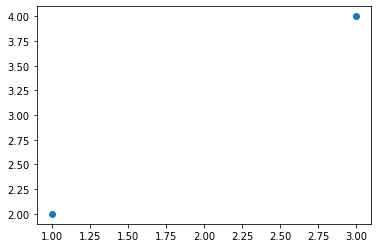

In [52]:
# 绘制点图查看两个点的位置
plt.plot(A[:,0], A[:, 1], 'o')

如果更进一步，我们希望在二维空间中找到一条直线，来拟合这两个点，也就是所谓的构建一个线性回归模型，我们可以设置线性回归方程如下：

<center> $ y = ax + b $ </center>

带入（1，2）和（3，4）两个点之后，我们还可以进一步将表达式改写成矩阵表示形式，改写过程如下

<img src="https://i.loli.net/2021/01/14/UEPNYc9OjGn3J5b.jpg" alt="8" style="zoom:50%;" />

而用矩阵表示线性方程组，则是矩阵的另一种常用用途，接下来，我们就可以通过上述矩阵方程组来求解系数向量x。

&emsp;&emsp;首先一个基本思路是，如果有个和A矩阵相关的另一个矩阵，假设为$A^{-1}$，可以使得二者相乘之后等于1，也就是$A * A^{-1} = 1$，那么在方程组左右两边同时左乘该矩阵，等式右边的计算结果$A^{-1} * B$就将是x系数向量的取值。而此处的$A^{-1}$就是所谓的A的逆矩阵。

逆矩阵定义：    
<center> $ 如果存在两个矩阵A、B，并在矩阵乘法运算下，A * B = E（单位矩阵），则我们称A、B互为逆矩阵$  </center>

在上述线性方程组求解场景中，我们已经初步看到了逆矩阵的用途，而一般来说，我们往往会通过伴随矩阵来进行逆矩阵的求解。由于伴随矩阵本身并无其他核心用途，且PyTorch中也未给出伴随矩阵的计算函数（目前），因此我们直接调用inverse函数来进行逆矩阵的计算。

> 当然，并非所有矩阵都有逆矩阵，对于一个矩阵来说，首先必须是方正，其次矩阵的秩不能为零，满足两个条件才能求解逆矩阵。

- inverse函数：求解逆矩阵

首先，根据上述矩阵表达式，从新定义A和B

In [53]:
A = torch.tensor([[1.0, 1], [3, 1]])
A

tensor([[1., 1.],
        [3., 1.]])

In [54]:
B = torch.tensor([2.0, 4])
B

tensor([2., 4.])

然后使用inverse函数进行逆矩阵求解

In [55]:
torch.inverse(A)

tensor([[-0.5000,  0.5000],
        [ 1.5000, -0.5000]])

简单试探逆矩阵的基本特性

In [56]:
torch.mm(torch.inverse(A), A)

tensor([[ 1.0000e+00, -5.9605e-08],
        [-1.1921e-07,  1.0000e+00]])

In [57]:
torch.mm(A, torch.inverse(A))

tensor([[ 1.0000e+00, -5.9605e-08],
        [-1.1921e-07,  1.0000e+00]])

然后在方程组左右两边同时左乘$A^{-1}$，求解x      
<center> $A^{-1} * A * x= A^{-1} * B $ </center>      
<center>$ E * x = A^{-1} * B $  </center>     
<center>$ x = A^{-1} * B$ </center> 

In [58]:
torch.mv(torch.inverse(A), B)

tensor([1.0000, 1.0000])

最终得到线性方程为：

<center>$ y = x + 1$ </center> 

当然，上述计算过程只是一个简化的线性方程组求解系数的过程，同时也是一个简单的一元线性方程拟合数据的过程，关于常用求解线性方程组系数的最小二乘法，可以先阅读本节末尾的选读内容，更多线性回归相关内容，我们将在下周进行详细讲解。     

## 五、矩阵的分解

&emsp;&emsp;矩阵的分解也是矩阵运算中的常规计算，矩阵分解也有很多种类，常见的例如QR分解、LU分解、特征分解、SVD分解等等等等，虽然大多数情况下，矩阵分解都是在形式上将矩阵拆分成几种特殊矩阵的乘积，但本质上，矩阵的分解是去探索矩阵更深层次的一些属性。本节将主要围绕特征分解和SVD分解展开讲解，更多矩阵分解的运算，我们将在后续课程中逐渐进行介绍。值得一提的是，此前的逆矩阵，其实也可以将其看成是一种矩阵分解的方式，分解之后的等式如下：      
<center> $A = A * A^{-1} * A $ </center>      
而大多数情况下，矩阵分解都是分解成形如下述形式      
<center> $ A = VUD$ </center>   

### 1.特征分解

特征分解中，矩阵分解形式为：       
<center> $ A = Q\Lambda Q^{-1}$ </center>         
其中，Q和$Q^{-1}$互为逆矩阵，并且Q的列就是A的特征值所对应的特征向量，而$\Lambda$为矩阵A的特征值按照降序排列组成的对角矩阵。

- torch.eig函数：特征分解

In [59]:
A = torch.arange(1, 10).reshape(3, 3).float()
A

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [60]:
torch.eig(A, eigenvectors=True)                 # 注，此处需要输入参数为True才会返回矩阵的特征向量

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2894.)
  """Entry point for launching an IPython kernel.


torch.return_types.eig(eigenvalues=tensor([[ 1.6117e+01,  0.0000e+00],
        [-1.1168e+00,  0.0000e+00],
        [ 2.9486e-07,  0.0000e+00]]), eigenvectors=tensor([[-0.2320, -0.7858,  0.4082],
        [-0.5253, -0.0868, -0.8165],
        [-0.8187,  0.6123,  0.4082]]))

输出结果中，eigenvalues表示特征值向量，即A矩阵分解后的Λ矩阵的对角线元素值，并按照又大到小依次排列，eigenvectors表示A矩阵分解后的Q矩阵，此处需要理解特征值，所谓特征值，可简单理解为对应列在矩阵中的信息权重，如果该列能够简单线性变换来表示其他列，则说明该列信息权重较大，反之则较小。特征值概念和秩的概念有点类似，但不完全相同，矩阵的秩表示矩阵列向量的最大线性无关数，而特征值的大小则表示某列向量能多大程度解读矩阵列向量的变异度，即所包含信息量，秩和特征值关系可用下面这个例子来进行解读。

In [61]:
B = torch.tensor([1, 2, 2, 4]).reshape(2, 2).float()
B

tensor([[1., 2.],
        [2., 4.]])

In [62]:
torch.matrix_rank(B)

tensor(1)

In [63]:
torch.eig(B)          # 返回结果中只有一个特征

torch.return_types.eig(eigenvalues=tensor([[0., 0.],
        [5., 0.]]), eigenvectors=tensor([]))

In [64]:
C = torch.tensor([[1, 2, 3], [2, 4, 6], [3, 6, 9]]).float()
C

tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])

In [65]:
torch.eig(C)                # 只有一个特征的有效值

torch.return_types.eig(eigenvalues=tensor([[ 1.4000e+01,  0.0000e+00],
        [ 6.2356e-08,  0.0000e+00],
        [-2.8243e-07,  0.0000e+00]]), eigenvectors=tensor([]))

特征值一般用于表示矩阵对应线性方程组解空间以及数据降维，当然，由于特征分解只能作用于方阵，而大多数实际情况下矩阵行列数未必相等，此时要进行类似的操作就需要采用和特征值分解思想类似的奇异值分解（SVD）。

### 2.奇异值分解（SVD）

&emsp;&emsp;奇异值分解（SVD）来源于代数学中的矩阵分解问题，对于一个方阵来说，我们可以利用矩阵特征值和特征向量的特殊性质（矩阵点乘特征向量等于特征值数乘特征向量），通过求特征值与特征向量来达到矩阵分解的效果     
<center> $ A = Q\Lambda Q^{-1}$ </center>            
这里，Q是由特征向量组成的矩阵，而Λ是特征值降序排列构成的一个对角矩阵（对角线上每个值是一个特征值，按降序排列，其他值为0），特征值的数值表示对应的特征的重要性。      
在很多情况下，最大的一小部分特征值的和即可以约等于所有特征值的和，而通过矩阵分解的降维就是通过在Q、Λ 中删去那些比较小的特征值及其对应的特征向量，使用一小部分的特征值和特征向量来描述整个矩阵，从而达到降维的效果。      
但是，实际问题中大多数矩阵是以奇异矩阵形式，而不是方阵的形式出现的，奇异值分解是特征值分解在奇异矩阵上的推广形式，它将一个维度为m×n的奇异矩阵A分解成三个部分 :      
<center> $ A = U\sum V^{T}$ </center>         
其中U、V是两个正交矩阵，其中的每一行（每一列）分别被称为左奇异向量和右奇异向量，他们和∑中对角线上的奇异值相对应，通常情况下我们只需要保留前k个奇异向量和奇异值即可，其中U是m×k矩阵，V是n×k矩阵，∑是k×k的方阵，从而达到减少存储空间的效果，即      
<center> $ A_{m*n} = U_{m*m}\sum_{m*n}V^{T}_{n*n}\approx U_{m*k}\sum_{k*k}V^{T}_{k*n}$ </center>   

- svd奇异值分解函数

In [66]:
C

tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])

In [67]:
torch.svd(C)

torch.return_types.svd(U=tensor([[-2.6726e-01,  9.6362e-01, -3.7767e-08],
        [-5.3452e-01, -1.4825e-01, -8.3205e-01],
        [-8.0178e-01, -2.2237e-01,  5.5470e-01]]), S=tensor([1.4000e+01, 4.2751e-08, 1.6397e-15]), V=tensor([[-0.2673, -0.9636,  0.0000],
        [-0.5345,  0.1482, -0.8321],
        [-0.8018,  0.2224,  0.5547]]))

In [68]:
CU, CS, CV = torch.svd(C)

验证SVD分解

In [69]:
torch.diag(CS)

tensor([[1.4000e+01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 4.2751e-08, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.6397e-15]])

In [70]:
torch.mm(torch.mm(CU, torch.diag(CS)), CV.t())

tensor([[1.0000, 2.0000, 3.0000],
        [2.0000, 4.0000, 6.0000],
        [3.0000, 6.0000, 9.0000]])

能够看出，上述输出完整还原了C矩阵，此时我们可根据svd输出结果对C进行降维，此时C可只保留第一列（后面的奇异值过小），即k=1  

In [71]:
U1 = CU[:, 0].reshape(3, 1)         # U的第一列
U1

tensor([[-0.2673],
        [-0.5345],
        [-0.8018]])

In [72]:
C1 = CS[0]                           # C的第一个值
C1

tensor(14.0000)

In [73]:
V1 = CV[:, 0].reshape(1, 3)           # V的第一行
V1

tensor([[-0.2673, -0.5345, -0.8018]])

In [74]:
torch.mm((U1 * C1), V1)

tensor([[1.0000, 2.0000, 3.0000],
        [2.0000, 4.0000, 6.0000],
        [3.0000, 6.0000, 9.0000]])

此时输出的Cd矩阵已经和原矩阵C高度相似了，损失信息在R的计算中基本可以忽略不计，经过SVD分解，矩阵的信息能够被压缩至更小的空间内进行存储，从而为PCA（主成分分析）、LSI（潜在语义索引）等算法做好了数学工具层面的铺垫。

**本节选读内容**

> 另外，我们需要知道的是，除了利用逆矩阵求解线性方程组系数外，比较通用的方法是使用最小二乘法进行求解：

- torch.lstsq：最小二乘法

&emsp;&emsp;最小二乘法是最通用的线性方程拟合求解工具，我们可以利用最小二乘法的直接计算拟合直线的系数最优解。当然，本节仅介绍最小二乘法的函数调用，下节在介绍目标函数和优化手段时，还将进一步介绍最小二乘法的数学原理。

In [75]:
torch.lstsq(B.reshape(2, 1), A)

RuntimeError: ignored

In [ ]:
x, q = torch.lstsq(B.reshape(2, 1), A)

In [ ]:
x

In [ ]:
q

我们发现，最小二乘法返回了两个结果，分别是x的系数和QR分解后的QR矩阵。

- solve函数与LU分解

In [ ]:
torch.solve(B.reshape(2, 1), A)

- LU分解函数

In [ ]:
torch.lu(A)